In [260]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob


In [261]:
def time_analysis(data):
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

    # Replace infinity values with NaN 
    data['date'] = data['date'].replace([float("inf"), -float('inf')], np.nan)

    # Forward fill missing dates
    data['date'] = data['date'].ffill()

    # Check for remaining missing values (should ideally be 0)
    print(f"Missing values in 'date' column after forward fill: {data['date'].isnull().sum()}")

    data['date'] = pd.to_datetime(data['date'])
    data['date'] = data['date'].dt.tz_convert('America/New_York')

    data['day_of_week'] = data['date'].dt.day_name()
    data['year'] = data['date'].dt.year
    data['hour'] = data['date'].dt.hour
    articles_by_day = data['day_of_week'].value_counts()
    articele_by_year = data['year'].value_counts()
    hour = data['hour'].value_counts()

    
    return [articles_by_day,articele_by_year, hour]

In [262]:
def visualize_publisher_vs_number_of_articles(data):
    data = data[:30]
    data.plot(kind='bar', figsize=(20, 6), color='skyblue')
    plt.title('Number of articles published by top 30 publishers')
    plt.xlabel('Publisher')
    plt.ylabel('Number of articles')
    plt.show()

In [263]:
def visualize_hourly_trend(data):
    data.plot(kind='bar', figsize=(20, 6), color='skyblue')
    plt.title('Number of articles published by hour')
    plt.xlabel('Hour')
    plt.ylabel('Number of articles')
    plt.show()

In [264]:
def visualize_day_of_week(data):
    data.plot(kind='bar', color='skyblue')
    plt.title('Number of Articles Published by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Articles')
    plt.show()

In [265]:
def visualize_by_year(data):
    data.plot(kind='bar', color='skyblue')
    plt.title('Number of Articles Published by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.show()

In [266]:
def visualize_sentment(sentement_count):
    # a graph with positive, negative and neutral
    sentement_count.plot(kind='bar', color='skyblue')
    plt.title('Sentiment Analysis of Articles')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Articles')
    plt.show()

In [267]:
def sentment_analysis(data):
    def get_sentiment(text):
        blob = TextBlob(text)
        sentiment_polarity = blob.sentiment.polarity  # Polarity score ranges from -1 (negative) to 1 (positive)
        if sentiment_polarity > 0:
            return 'positive'
        elif sentiment_polarity < 0:
            return 'negative'
        else:
            return 'neutral'
        
    data['sentiment'] = data['headline'].apply(get_sentiment)
    sentiment_counts = data['sentiment'].value_counts()

    return sentiment_counts


In [268]:
def identify_unique_domains(data):
    pattern = r'@(.*?)[\.\s]'
    data['domain'] = data['publisher'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else '')
    
    return data['domain']

In [269]:
def visualize_unique_domains(data):
    data = data.value_counts()
    data = data[1:]
    data.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Number of articles published by unique domains')
    plt.xlabel('Domain')
    plt.ylabel('Number of articles')
    plt.show()

In [270]:
def eda(data):
    # count headline length
    data['head_line'] = data['headline'].apply(len)
    print(data['head_line'].describe())

    # count publisher frequency
    articles = data['publisher'].value_counts()
    visualize_publisher_vs_number_of_articles(articles)
    print(articles)


    # analyze publication data to see trends
    articles_by_day = time_analysis(data)[0]
    articles_by_year = time_analysis(data)[1]
    print(articles_by_day)
    print(articles_by_year)
    visualize_by_year(articles_by_year)
    visualize_day_of_week(articles_by_day)
    

    # sentment analysis
    # sentement_count = sentment_analysis(data)
    # print(sentement_count)
    # visualize_sentment(sentement_count)


    # time series analysis
    hourly_trend = time_analysis(data)[2]
    visualize_hourly_trend(hourly_trend)
    
    unique_domains = identify_unique_domains(data)
    print(unique_domains.unique())
    visualize_unique_domains(unique_domains)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: head_line, dtype: float64


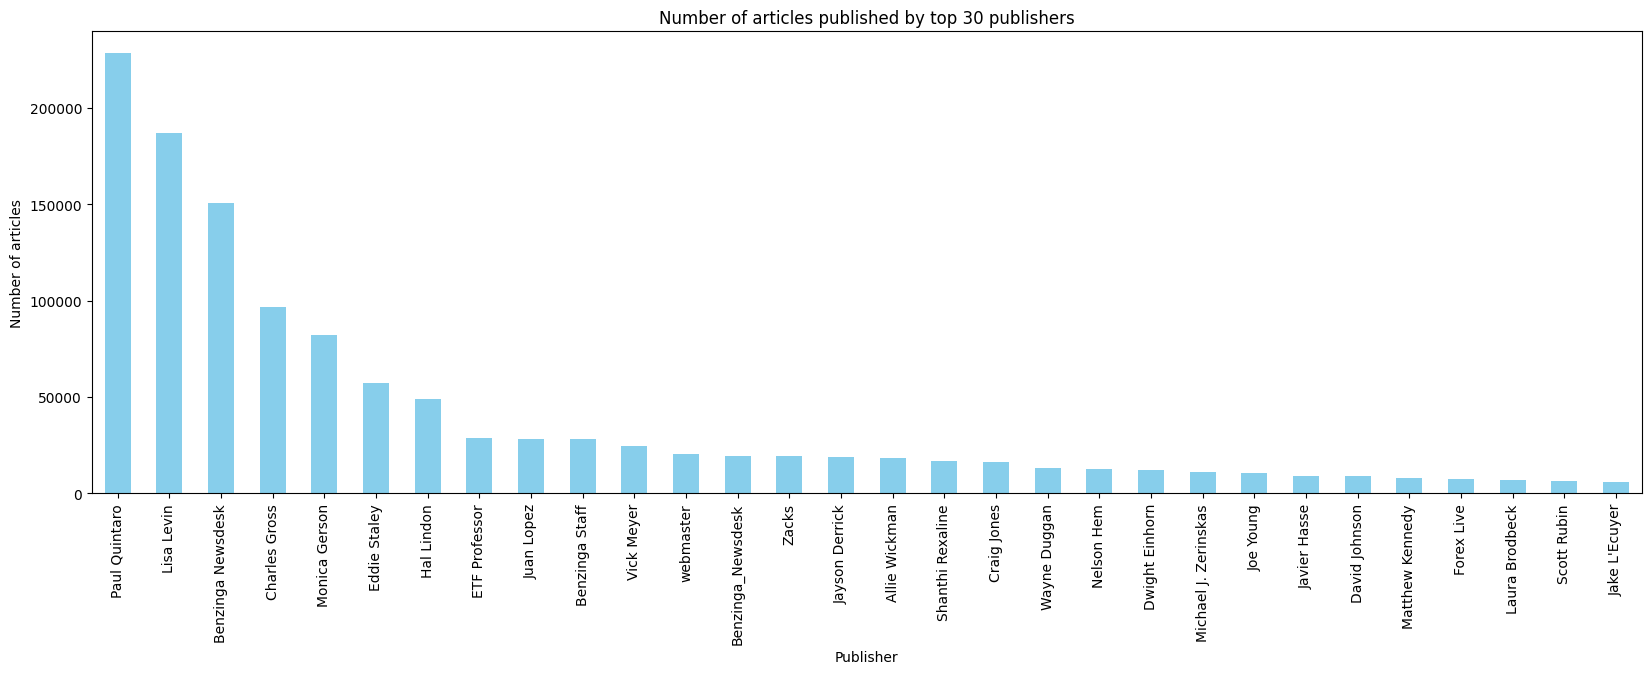

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64
Missing values in 'date' column after forward fill: 0
Missing values in 'date' column after forward fill: 0
day_of_week
Thursday     299995
Wednesday    299321
Tuesday      297182
Friday       244727
Monday       241219
Sunday        14933
Saturday       9951
Name: count, dtype: int64
year
2020    1009078
2019     129255
2018      75361
2017      61372
2016      58801
2015      48983
2014      10607
2013       6400
2012       4844
2011       2627
Name: count, dtype: int64


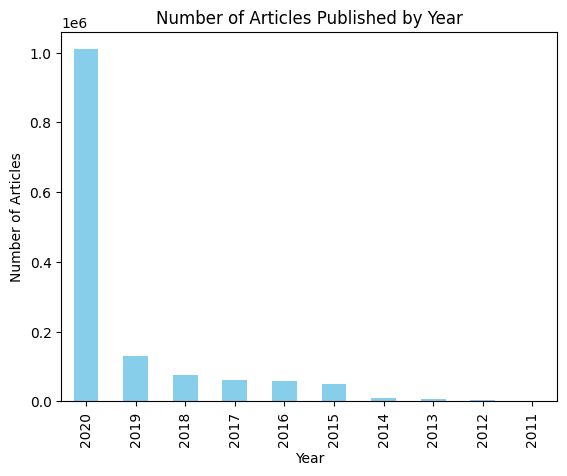

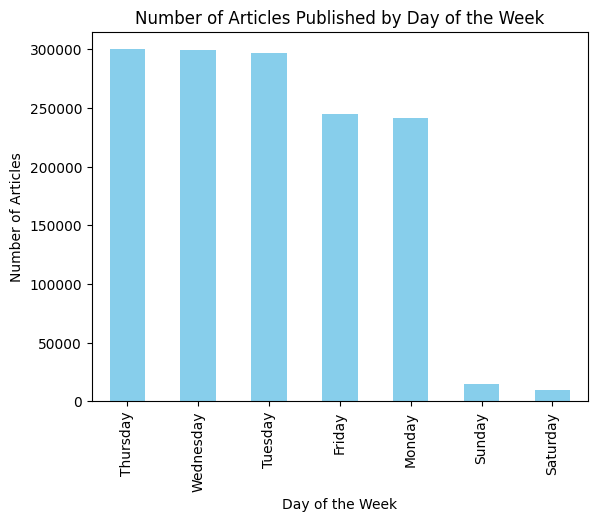

Missing values in 'date' column after forward fill: 0


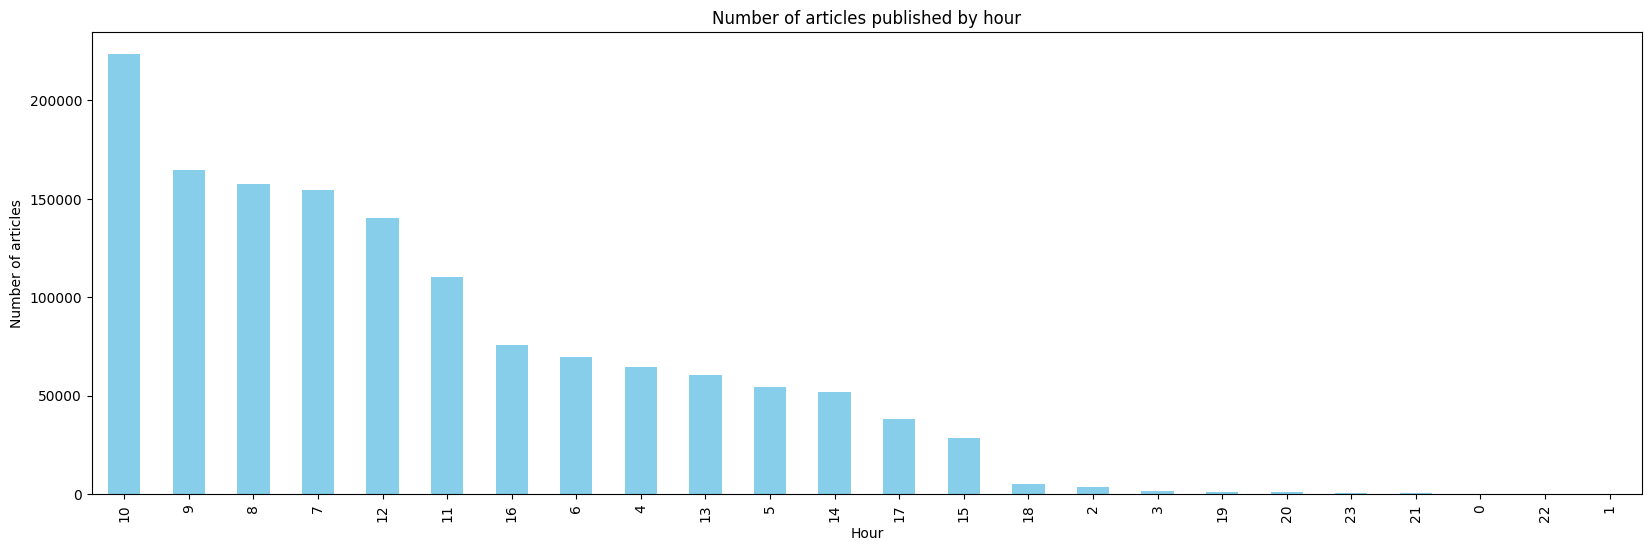

['' 'benzinga' 'gmail' 'andyswan' 'investdiva' 'eosdetroit' 'tothetick'
 'forextraininggroup' 'stockmetrix']


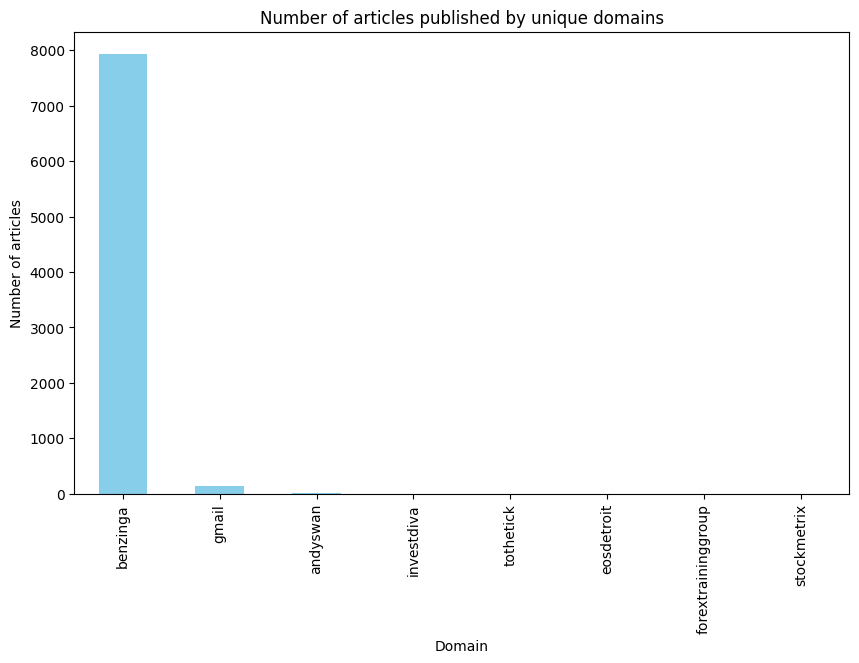

In [271]:
# read data
data = pd.read_csv('../../data/raw_analyst_ratings.csv')

eda(data)